<a href="https://colab.research.google.com/github/mwang-cmn/Bank-Customer-Churn-Prediction/blob/main/Banking_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Bank Churn Prediction Study

Customer retention is a crucial aspect of strategic management for financial institutions, as customer churn significantly impacts profitability and long-term sustainability. This study conducts a comprehensive analysis of customer churn prediction using machine learning techniques, specifically Logistic Regression and Random Forest classifiers. By assessing model performance through metrics such as the Area Under the Curve (AUC) and analyzing key customer attributes, the goal is to enhance predictive accuracy and inform targeted retention strategies.

## Objectives of the Study

1. **Evaluate Model Performance**: To compare the effectiveness of Logistic Regression and Random Forest classifiers in predicting customer churn using the AUC and ROC curve analysis.
2. **Identify Influential Factors**: To determine the key features influencing customer churn, such as age, product usage, balance, and tenure.
3. **Recommend Retention Strategies**: To provide actionable insights and recommendations for improving customer retention based on predictive analysis.

## Problem Statement
How do key customer features, such as age, number of products, and account balance, interact to influence the likelihood of churn, and can these interactions be leveraged to develop more accurate predictive models and targeted customer retention strategies?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [139]:
path = "/content/drive/MyDrive/Colab Notebooks/Bank_Customer_Churn/"
data = pd.read_csv(path + "Bank_Churn.csv")

In [140]:
churn_data = data.copy()
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Understanding

- **CustomerId**: *Integer* – Unique customer identifier; non-predictive.
- **Surname**: *String* – Customer's last name; non-predictive.
- **CreditScore**: *Integer* – Represents creditworthiness
- **Geography**: *String* – Country of residence (e.g., France, Spain)
- **Gender**: *String* – Customer's gender
- **Age**: *Integer* – Age of the customer
- **Tenure**: *Integer* – Years with the bank
- **Balance**: *Float* – Account balance; valuable for assessing customer worth.
- **NumOfProducts**: *Integer* – Number of products held; reflects customer engagement.
- **HasCrCard**: *Binary (0/1)* – Ownership of a credit card
- **IsActiveMember**: *Binary (0/1)* – Indicates if the customer is active; suggests engagement level.
- **EstimatedSalary**: *Float* – Approximate yearly income;
- **Exited**: *Binary (0/1)* – Target variable indicating churn status (1 = exited, 0 = retained).

In [106]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [107]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [108]:
churn_data.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [109]:
churn_data.duplicated().sum()

0

In [141]:
#Drop Surname and CustomerId and reset index
churn_data.drop(["Surname", "CustomerId"], axis=1, inplace=True)
churn_data.reset_index(drop=True, inplace=True)

In [142]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [143]:

#rename exited to Churn
churn_data.rename(columns={"Exited": "Churn"}, inplace=True)

# Exploratory Data Analysis

Churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


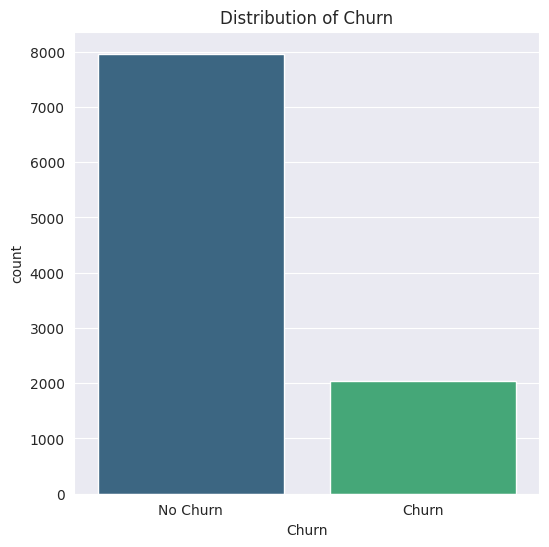

In [144]:
# Distribution of Churn column
print(churn_data["Churn"].value_counts(normalize=True))
plt.figure(figsize=(6,6))
sns.countplot(x='Churn', data = churn_data, palette='viridis')
plt.title("Distribution of Churn")
plt.xticks([0,1], ["No Churn", "Churn"])
plt.show()

**Univariate Analysis**

<Figure size 600x400 with 0 Axes>

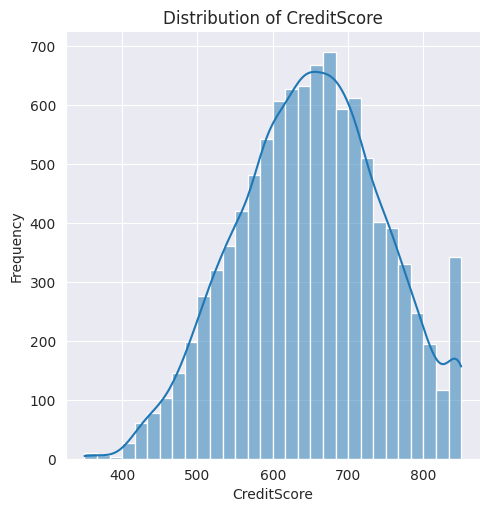

<Figure size 600x400 with 0 Axes>

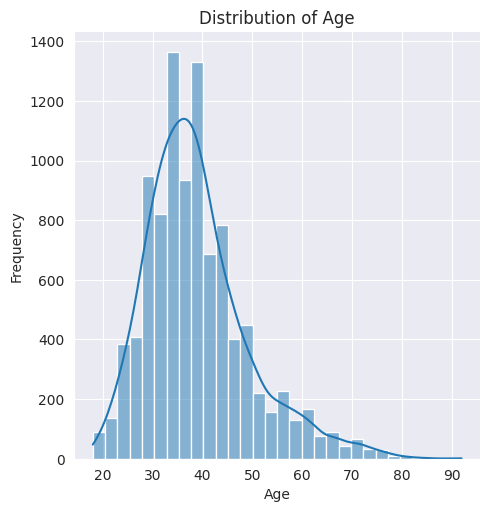

<Figure size 600x400 with 0 Axes>

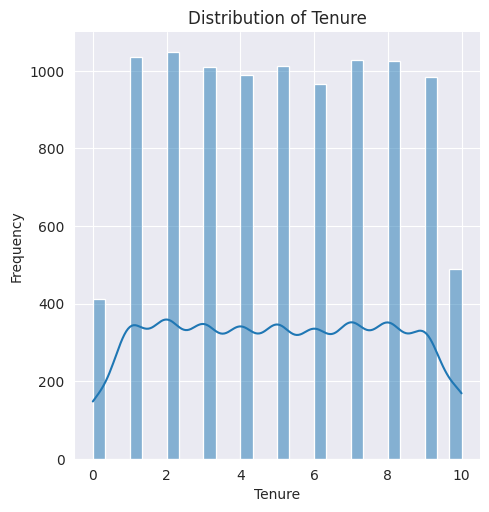

<Figure size 600x400 with 0 Axes>

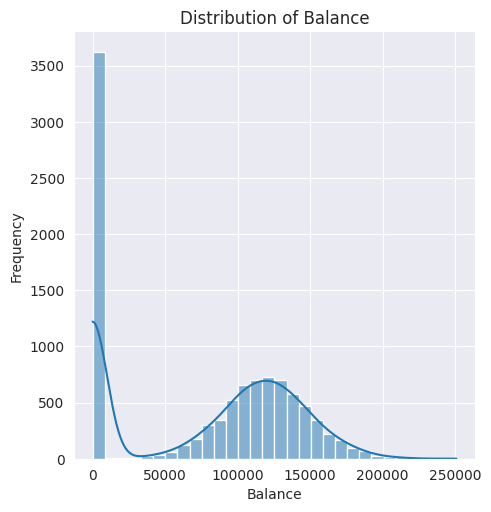

<Figure size 600x400 with 0 Axes>

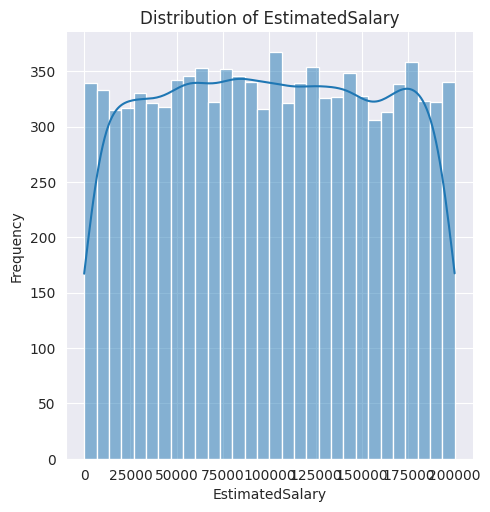

In [145]:
# Define numerical and categorical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
categorical_cols = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember", "Churn"]

# Set style
sns.set_style("darkgrid")

# Plot numerical features using displot
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.displot(churn_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



**Insights**

1. There are more than 3500 customers with 0 balance in their accounts. This suggests that they could have low income
2. More than 90% of clients have been with the bank for a period of more than one year
3. Majority of clients are between the age of 25 and 50, which represents a significant part of the workforce. However, there are a few elderly clients. These accounts could represent retirees and are likely to be closed in a short horizon.


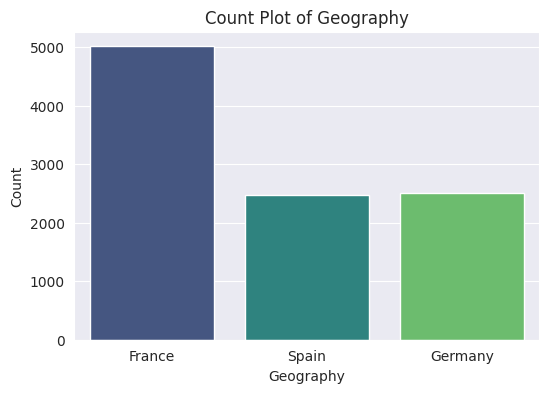

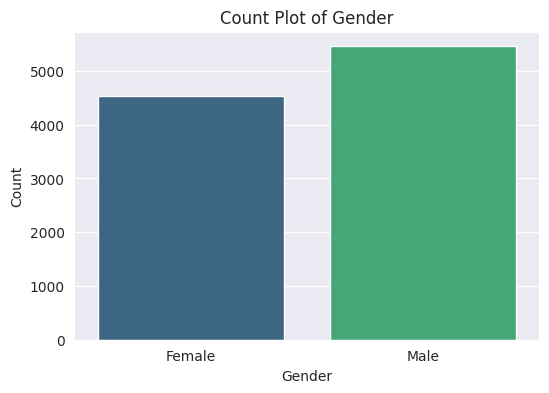

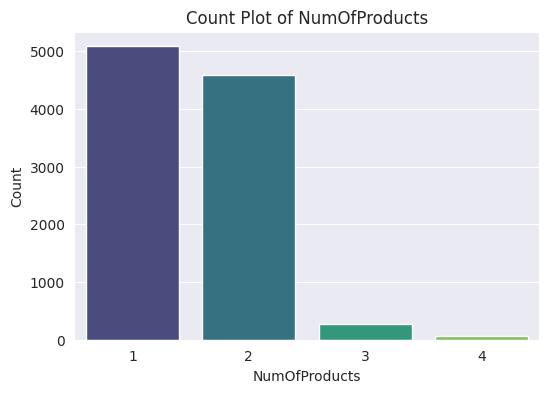

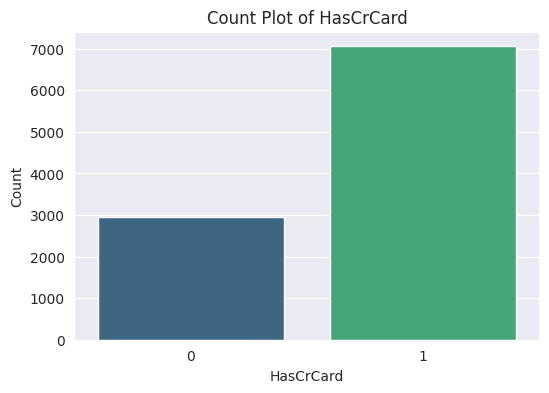

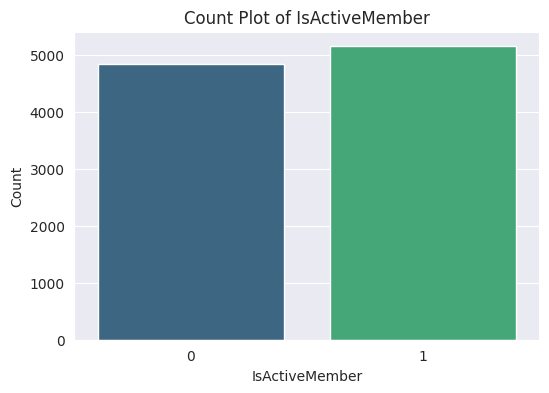

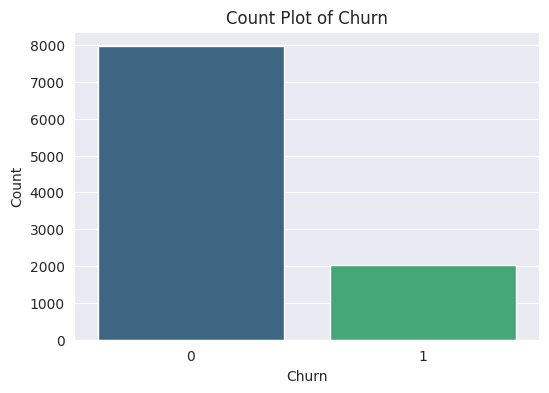

In [146]:
# Plot categorical features
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=churn_data[col], palette="viridis")
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

**Insights**

1. There are more male customers than female customers
2. More than 50% of the customers have only 1 product with the Bank
3. 60% of the customers have a credit card with the bank.
4. There is a balance between the number of active and inactive accounts. This is concerning as inactive members are likely to churn

**Multivariate Analysis**

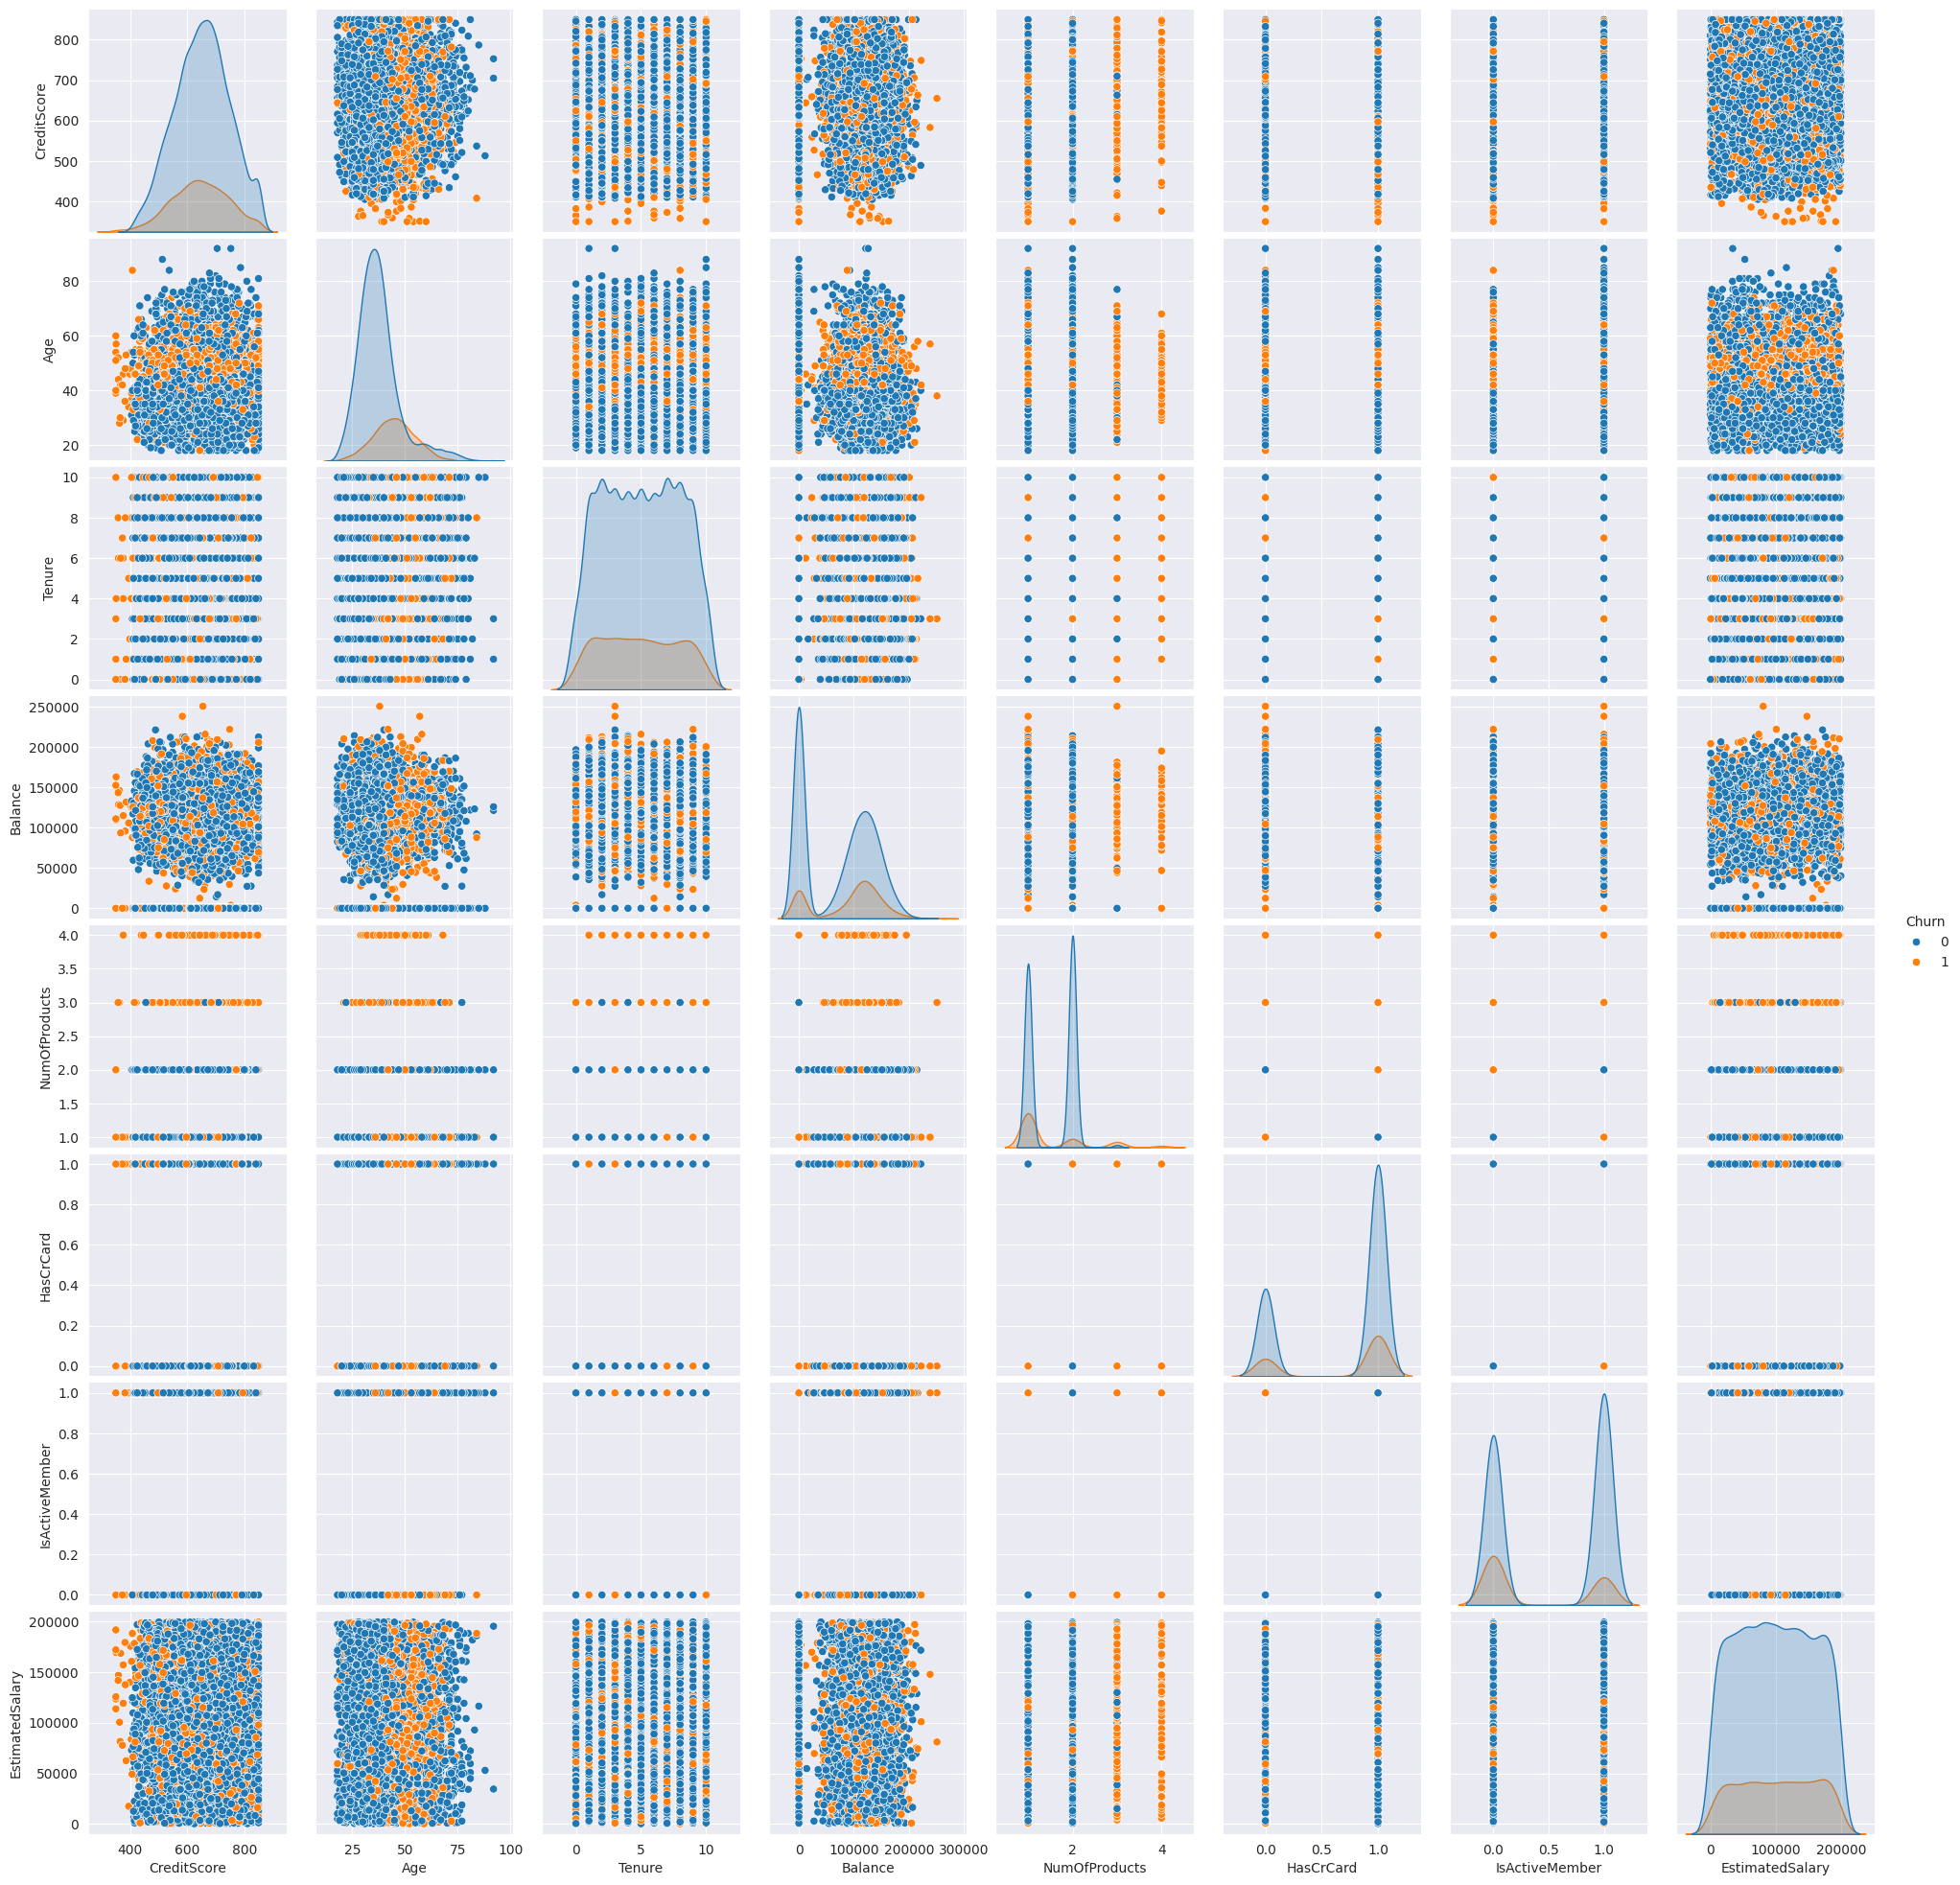

In [116]:
sns.pairplot(churn_data, hue='Churn')
plt.show()

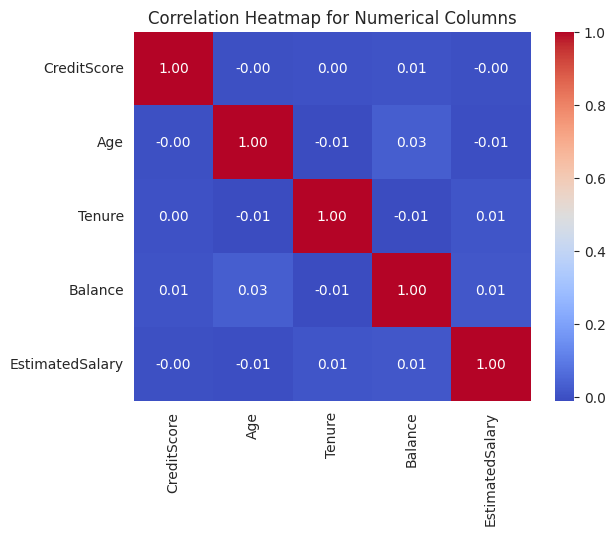

In [117]:
correlation_matrix = churn_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

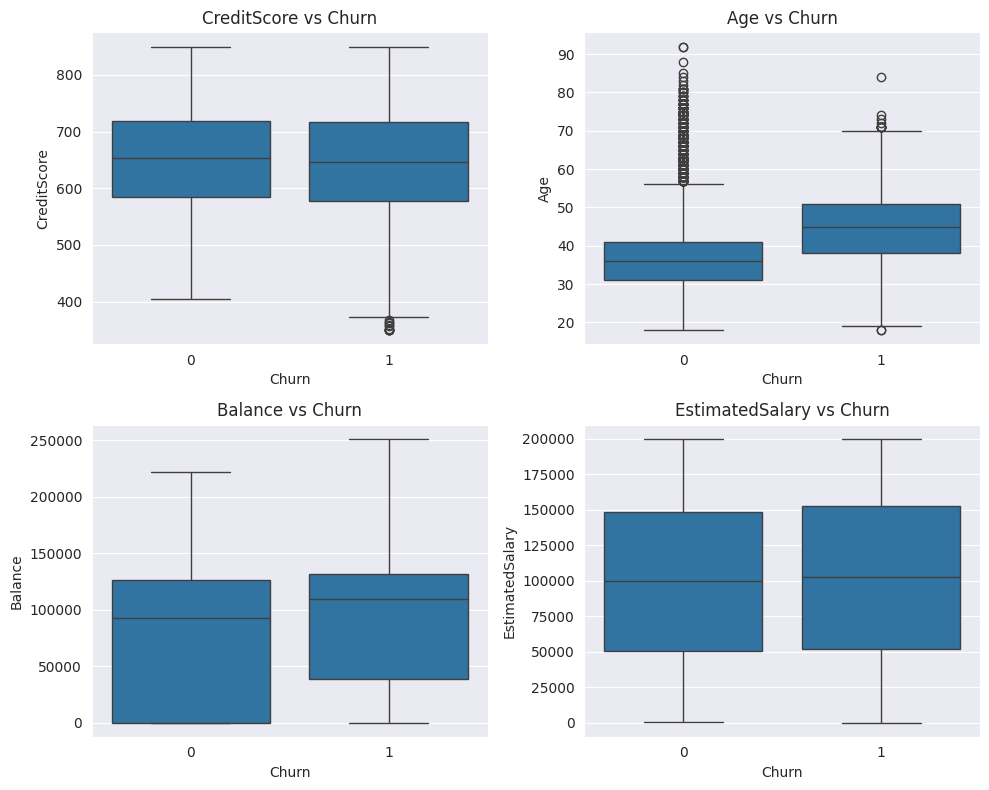

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# CreditScore vs Churn
sns.boxplot(x='Churn', y='CreditScore', data=churn_data, ax=axes[0, 0])
axes[0, 0].set_title('CreditScore vs Churn')
# Age vs Churn
sns.boxplot(x='Churn', y='Age', data=churn_data, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Churn')
# Balance vs Churn
sns.boxplot(x='Churn', y='Balance', data=churn_data, ax=axes[1, 0])
axes[1, 0].set_title('Balance vs Churn')
# EstimatedSalary vs Churn
sns.boxplot(x='Churn', y='EstimatedSalary', data=churn_data, ax=axes[1, 1])
axes[1, 1].set_title('EstimatedSalary vs Churn')
plt.tight_layout()
plt.show()

### Feature Engineering

In [119]:
# One hot encoding
churn_data = pd.get_dummies(churn_data, columns=['Geography'], drop_first=True)
churn_data['Gender'] = churn_data['Gender'].map({'Female': 0, 'Male': 1})


In [120]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
churn_data[numerical_cols] = scaler.fit_transform(churn_data[numerical_cols])


In [121]:
churn_data['Balance_to_Salary'] = churn_data['Balance'] / (churn_data['EstimatedSalary'] + 1)


In [122]:
churn_data['HasMultipleProducts_CrCard'] = (churn_data['NumOfProducts'] > 1) & (churn_data['HasCrCard'] == 1)
churn_data['HasMultipleProducts_CrCard'] = churn_data['HasMultipleProducts_CrCard'].astype(int)

In [123]:
churn_data.drop(["NumOfProducts", "HasCrCard", "Balance"], axis=1, inplace=True)

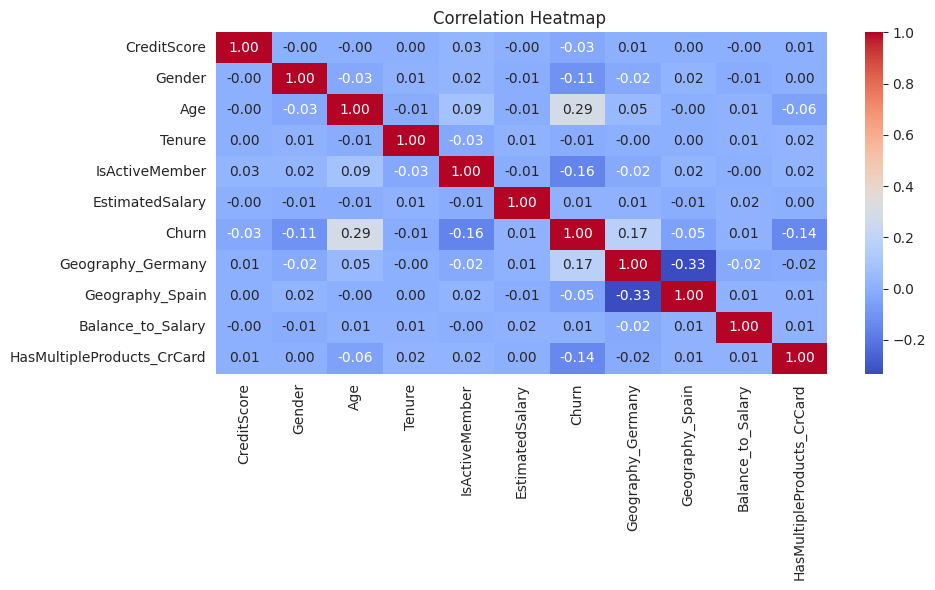

In [124]:
plt.figure(figsize=(10, 6))
correlation_matrix = churn_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap ')
plt.tight_layout()
plt.show()

Following feature engineering, the Age column indicates the highest correlation to the Churn column which is the response variable. I created the Balance_to_Salary column, that indicates how much of a customer's salary is in their account.

I created a new feature that combines NumOfProducts and HasCrCard, HasMultipleProducts_CrCard, a binary feature indicating whether the customer has multiple products and a credit card.

I also encoded the Geography and Gender columns to nmerical features. I scaled the numerical features and finally dropped the Balance, Credit card and Number of Products columns.

## Logistic Regression

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [126]:
X = churn_data.drop("Churn", axis=1)
y = churn_data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [127]:
log_reg = LogisticRegression()
# Fit the model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [128]:
# Predict on test data
y_pred = log_reg.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8090


Accuracy of the model is 80.75%

**Evaluation of the Logistic Regression Model**

Confusion Matrix:
 [[1537   56]
 [ 326   81]]


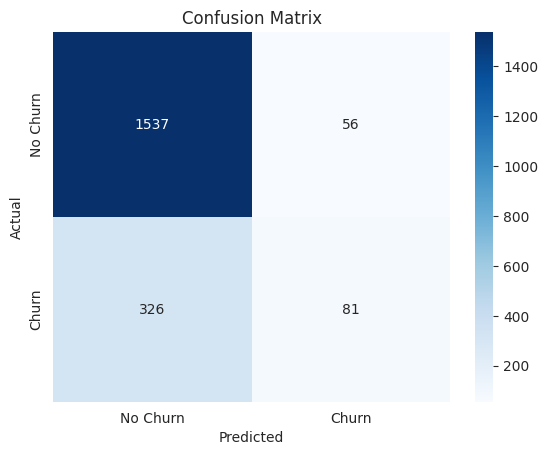

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.59      0.20      0.30       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [129]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

The results from the confusion matrix are as follows:
- 81 true positives
- 59 false positives
- 326 false negatives
- 1534 true negatives

The model has a decent accuracy but may not be the best measure due to class imbalance.Of all customers predicted to churn, only 58% actually churn.
A high number of false positives (59) means the model is incorrectly predicting some non-churners as churners.

The low F1-score, for the churners, suggests that the model is struggling to balance precision and recall
The recall is very low, meaning the model misses a lot of actual churners (326 false negatives).
Only 20% of actual churners are correctly identified. This is concerning, as the goal is to detect customers who are likely to leave.

The model is better at Predicting Non-Churners (High Specificity - 96.7%)
The model is too biased towards predicting "No Churn".
This is likely due to class imbalance



While metrics like precision, recall, and F1-score provide insights about which model best fits the data, they do so only at a single threshold.
The AUC-ROC, or Area Under the Receiver Operating Characteristic Curve, is a robust metric that evaluates the goodness of the model across the full spectrum of thresholds.

**ROC Curve and AUC**

AUC and ROC are valuable metrics for evaluating logistic regression models in churn prediction.

The ROC curve visualizes the trade-off between true and false positives, while the AUC score quantifies the model's overall performance.

The ROC curve is a visual representation of the trade-offs between the true positive rate (TPR) and false positive rate (FPR) at various thresholds. It provides insights into how well the model can balance the trade-offs between **detecting positive** instances and **avoiding false positives** across different thresholds.

AUC, or Area Under the Curve, is a **single scalar value** ranging from 0 to 1, that gives a performance snapshot of the model.

These metrics are robust to imbalanced datasets and help identify optimal classification thresholds.

A higher AUC indicates better model performance, enabling businesses to make informed decisions for customer retention.

## **Random Forest Model**


In [130]:
# import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [131]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': np.arange(1,101,1),
    'max_depth': np.arange(1, 11, 1),
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', 'balanced_subsample', None] # Weights associated with classes
}
rf_model = RandomForestClassifier()
rf = RandomizedSearchCV(rf_model, param_distributions = param_grid, cv=5, random_state=42)
rf.fit(X_train, y_train)
params_rf = rf.best_params_
params_rf

{'n_estimators': 92,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'class_weight': None}

In [132]:
rf_model_1 = RandomForestClassifier(n_estimators=params_rf["n_estimators"],
                                    max_depth=params_rf["max_depth"],
                                    min_samples_split=params_rf["min_samples_split"],
                                    min_samples_leaf=params_rf["min_samples_leaf"],
                                    max_features=params_rf["max_features"],
                                    class_weight={0:1, 1:3},
                                    random_state=42)
rf_model_1.fit(X_train, y_train )
pred_rf = rf_model_1.predict(X_test)


Confusion Matrix:
 [[1373  220]
 [ 172  235]]


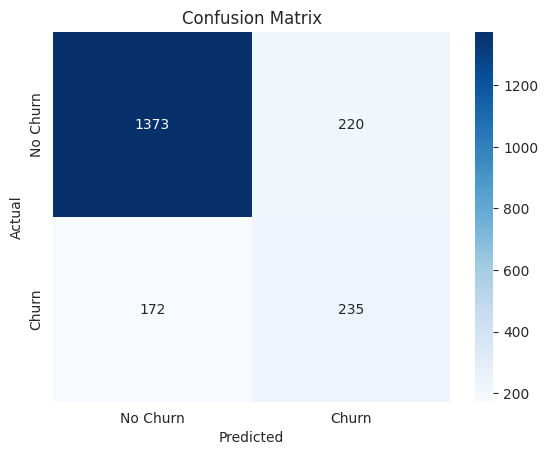

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      1593
           1       0.52      0.58      0.55       407

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.81      2000



In [147]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, pred_rf))


In [134]:
accuracy = accuracy_score(y_test, pred_rf)
print(f"Accuracy Score: {accuracy:.4f}")

Accuracy Score: 0.8040


In [135]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for ROC-AUC
y_probs_rf = rf_model_1.predict_proba(X_test)[:, 1]

# Compute ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.8163602739873927


**Insights**

- True Positives (TP) = 245
- False Negatives (FN) = 162
- False Positives (FP) = 235
- True Negatives (TN) = 1358

**Higher Accuracy** (80.15%): Random Forest outperforms Logistic Regression in overall accuracy.

**Better Churn Precision** (0.51): Random Forest is better at predicting churners (fewer false positives).

**Balanced F1-Score for Churners (0.55**): Random Forest offers a better trade-off between precision and recall.

**Better Non-Churn Recall (0.85)**: Random Forest captures more non-churners accurately.

**ROC-AUC Score (0.816)**: Random Forest has a higher AUC, indicating better model discrimination.


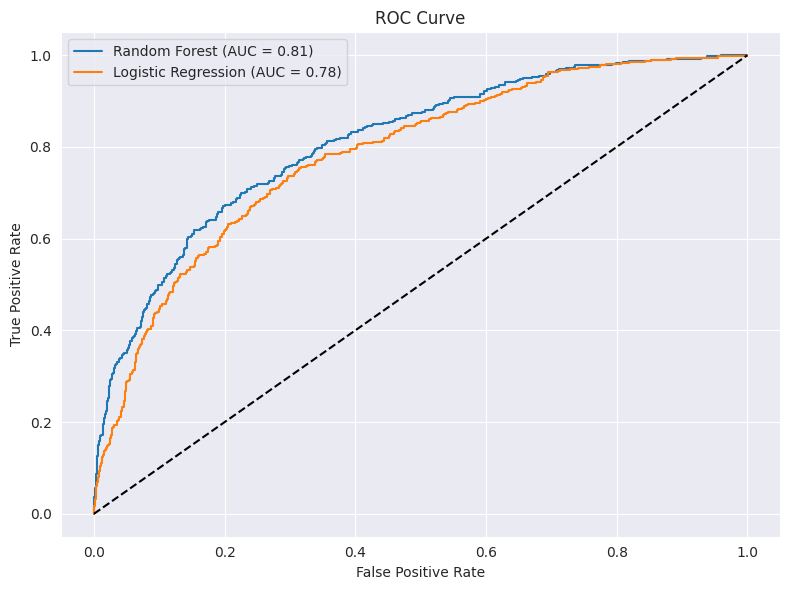

In [136]:
# Plot ROC Curve
y_probs_rf = rf_model_1.predict_proba(X_test)[:, 1]
y_probs_lr = log_reg.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(y_test, y_probs_lr)
roc_auc_rf = roc_auc_score(y_test, y_probs_rf)
# Calculate ROC curve for both models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)

# Plot ROC Curve for both models
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf ,label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


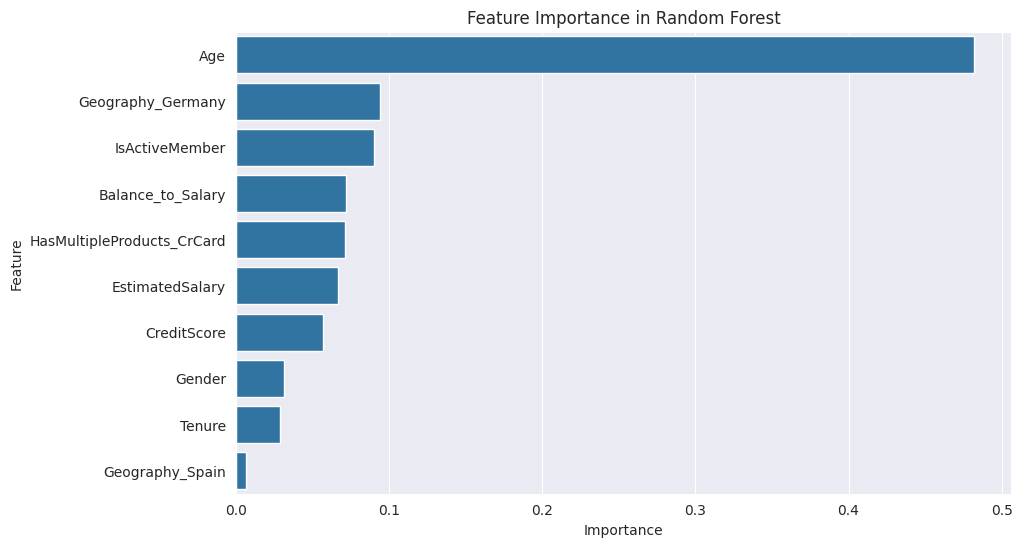

In [137]:
# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model_1.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importances)
plt.title("Feature Importance in Random Forest")
plt.show()

### Key Observations:

- **Random Forest Superiority**: The Random Forest model demonstrates superior performance, as evidenced by its higher AUC score of **0.817** compared to Logistic Regression's **0.78**.
  
- **Discriminative Power**: Both models outperform a random guess (AUC = 0.50), indicating their ability to distinguish between positive and negative classes. The Random Forest model, however, has a stronger ability to identify churn compared to Logistic Regression.
  
- **Model Stability**: The Random Forest model's ROC curve exhibits a smoother trajectory, suggesting greater stability and robustness across various classification thresholds. In contrast, the Logistic Regression curve shows more fluctuations, indicating potential sensitivity to specific decision thresholds.

### Implications:

- **Model Selection**: Given the dataset and task, the **Random Forest model** is the preferred choice due to its superior performance and stability. It demonstrates better handling of class imbalance through the adjustment of class weights and shows overall higher discriminative power.
  
- **Future Improvements**: While the Random Forest model performs well, further optimization through techniques like **hyperparameter tuning** and **feature engineering** could enhance its performance even further. This could include exploring additional features or refining existing ones, and fine-tuning model parameters like **max depth**, **min samples split**, or **n_estimators**.

- **Model Interpretability**: If interpretability is a critical factor, **Logistic Regression** might be considered, despite its lower performance. However, techniques such as **SHAP** (SHapley Additive exPlanations) can be employed to improve the interpretability of complex models like Random Forest without sacrificing performance.

### Conclusion:

Based on the ROC curves and AUC scores, the **Random Forest model** emerges as a more effective classifier for the given dataset. Its superior performance and stability make it a reliable choice for predictive modeling tasks. However, the choice of model should ultimately depend on the specific requirements of the application, including factors such as accuracy, interpretability, and computational cost.

---

### Analysis of Feature Importance:

1. **Age**: This feature emerges as the most influential factor in predicting churn. **Age** has a **significant impact**, with an importance score of **0.4641**. Older customers might have different needs and expectations, making them more susceptible to churn.
   
2. **IsActiveMember**: The **activity status of a customer** is also a key predictor, with an importance score of **0.1069**. Active members tend to be more engaged and loyal, reducing the likelihood of churn.

3. **Geography_Germany**: Customers in **Germany** show an important trend in the model (importance score of **0.0864**). The geographical region significantly impacts churn behavior in this case.

4. **HasMultipleProducts_CrCard**: The **number of products** a customer holds, particularly **credit cards**, ranks high in importance (importance score of **0.0522**). Customers with multiple products are generally less likely to churn due to higher engagement.

5. **CreditScore**: A **high credit score** (importance score of **0.0517**) correlates with financial stability and trustworthiness, which might decrease churn.

6. **Balance_to_Salary**: The **ratio of balance to salary** (importance score of **0.0501**) indicates customers' financial health. Higher balance-to-salary ratios tend to correlate with greater loyalty and a lower risk of churn.

7. **EstimatedSalary**: This metric, with an importance score of **0.0429**, suggests that customers' **estimated salary** influences churn, with higher salaries potentially leading to lower churn rates.

8. **Gender**: Although **gender** (importance score of **0.0241**) contributes to churn predictions, its impact is less significant compared to other features, indicating a relatively weaker relationship with churn.

9. **Tenure**: The **duration** a customer has been with the bank (importance score of **0.0234**) also plays a role, where long-tenure customers are generally more loyal and less likely to churn.

10. **Geography_Spain**: The **Spain** geography factor (importance score of **0.0051**) shows a very minor contribution to predicting churn, suggesting its relatively minimal impact on churn compared to other features.

---

### Model Performance and Evaluation:

- The **Random Forest model** achieved an **AUC score of 0.817**, indicating superior discriminative power and stability across various classification thresholds. Its smoother ROC curve suggests consistent performance, making it a robust choice for this predictive task.
  
- The **Logistic Regression model**, while performing decently with an AUC score of **0.78**, showed more fluctuations in its ROC curve, which suggests greater sensitivity to certain decision thresholds.

- **Hyperparameter Tuning**: The Random Forest model was further optimized, which led to improvements in its performance. Random Search CV allowed for broader exploration, identifying optimized parameters faster.

### Recommendations for Customer Retention:

1. **Targeted Marketing**: Focus on retention efforts for **older customers** and those with **fewer products**. Since Age and Product Count are significant features, these customers might need additional incentives or engagement to stay.

2. **Personalized Offers**: Create tailored offers for customers based on their **balance**, **credit score**, and **estimated salary**. High-value customers with low churn probability should be rewarded with loyalty programs.

3. **Enhanced Customer Experience**: Prioritize enhancing the experience for **active members** and **long-tenure customers**. These groups are more likely to remain loyal, so focusing on engagement can further reduce churn.

4. **Product Bundling**: Bundle products to increase **customer value**. Offering multiple products could improve loyalty, particularly among customers with high balance-to-salary ratios.

5. **Financial Incentives**: Offer **discounts**, **rewards**, or **loyalty programs** to retain high-value customers, particularly those with high credit scores or balances.

6. **Customer Segmentation**: Segment customers based on features such as **age**, **tenure**, and **product usage**.

